### Task: Implement standardize function

In [ ]:
# Solution: Standardization (Z-score normalization)
def standardize(X: np.ndarray) -> tuple:
    """
    Standardize features to have mean=0 and std=1.
    
    Returns:
        Tuple of (X_standardized, mean, std)
    """
    # Your code here
    pass

In [ ]:
# Standardize and train
X_scaled, X_mean, X_std = standardize(X_unscaled)

print(f"Scaled feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]")

w_good, b_good, losses_good = train_linear_regression(
    X_scaled, y_unscaled, learning_rate=0.1, n_iterations=500
)

TypeError: cannot unpack non-iterable NoneType object

---
# Tasks (Deadline: Sunday 30th Nov 2025)

Complete the following tasks to practice implementing gradient descent for linear regression.

## Task 1: Implement Mini-Batch Gradient Descent

Instead of using all samples in each iteration (batch gradient descent), implement **mini-batch gradient descent** which uses a random subset of samples.

Formally said, choose $X_b$ and its corresponding $y_b$ which is a subset of $row(X), row(y)$ to be trained for each iteration.


Benefits of mini-batch:
- Faster iterations
- Can escape local minima
- Better generalization

```python
# Expected usage:
w, b, losses = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=1000)
```

In [ ]:
def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 20,
) -> tuple:
    """
    Train linear regression using mini-batch gradient descent.
    
    Hints:
    - Use np.random.choice to select random indices
    - Compute gradients using only the selected samples
    """
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        # Your code here
        pass
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [ ]:
_, _, loss_history = train_minibatch_gd(
    X, y,
    batch_size=64,
    learning_rate=0.01,
    n_iterations=200,
    log_every_n_step=50
)

## Task 2: Implement Learning Rate Scheduling

Implement a training function that **decreases the learning rate** over time. This helps converge more precisely at the end of training.

Common schedules:
- Step decay: $\alpha_t = \alpha_0 \cdot 0.9^{\lfloor t/100 \rfloor}$
- Exponential decay: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- Inverse time: $\alpha_t = \frac{\alpha_0}{1 + k \cdot t}$

where $t$ is number of current step/iteration and $k$ is the decay constant

In [ ]:
def train_with_lr_schedule(
    X: np.ndarray,
    y: np.ndarray,
    initial_lr: float = 0.1,
    schedule: str = 'exponential',  # 'step', 'exponential', or 'inverse'
    n_iterations: int = 1000,
    decay_constant: float = 0.0001,
) -> tuple:
    """
    Train with learning rate scheduling.
    
    Implement at least one scheduling strategy.
    """
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    learning_rate = initial_lr
    loss_history = []
    for i in range(n_iterations):
        # Your code here
        pass
    

In [ ]:
# Test them all:
print("Step decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='step',
    n_iterations=500,
    decay_constant=0.0001
)

print("Exponential decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='exponential',
    n_iterations=500,
    decay_constant=0.0001
)

print("Inverse time decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='inverse',
    n_iterations=500,
    decay_constant=0.0001
)

## Task 3: Add Regularization (Ridge Regression)

Implement **L2 regularization** (Ridge regression) to prevent overfitting.

The loss function becomes:
$$\mathcal{L} = \mathcal{L}_{MSE} + \lambda \sum w_i^2$$

The gradient for weights becomes:
$$\frac{\partial Loss}{\partial w} = \frac{\partial MSE}{\partial w} + 2\lambda w$$

where $\lambda$ is the regularization constant and $w_i$ is the weight value of corresponding feature $i$

In [ ]:
def calculate_ridge_loss(y_true: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> float:
    """
    Compute Ridge regression loss (MSE + L2 regularization).
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
    
    Returns:
        Ridge loss value
    """
    # Your code here
    pass

def calculate_ridge_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> tuple:
    """
    Compute gradients for Ridge regression.
    
    Args:
        X: Feature matrix
        y: True target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
        """
    # Your code here
    pass

def train_ridge_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    reg_lambda: float = 0.1,  # Regularization strength
    n_iterations: int = 1000
) -> tuple:
    """
    Train linear regression with L2 regularization.
    
    Hints:
    - Modify the loss calculation to include regularization term
    - Modify the gradient calculation for weights
    - Note: We typically don't regularize the bias term
    """
    # Your code here
    pass


In [ ]:
_, _, _ =train_ridge_regression(
    X, y,
    learning_rate=0.01,
    reg_lambda=0.1,
    n_iterations=500
)

## Bonus Task: Implement Stochastic Gradient Descent (SGD)

Implement pure SGD where you update weights after **each individual sample** (batch_size=1).

Compare the convergence behavior of:
1. Batch GD (all samples)
2. Mini-batch GD (e.g., 32 samples)
3. SGD (1 sample)

Plot the loss curves for all three on the same graph.

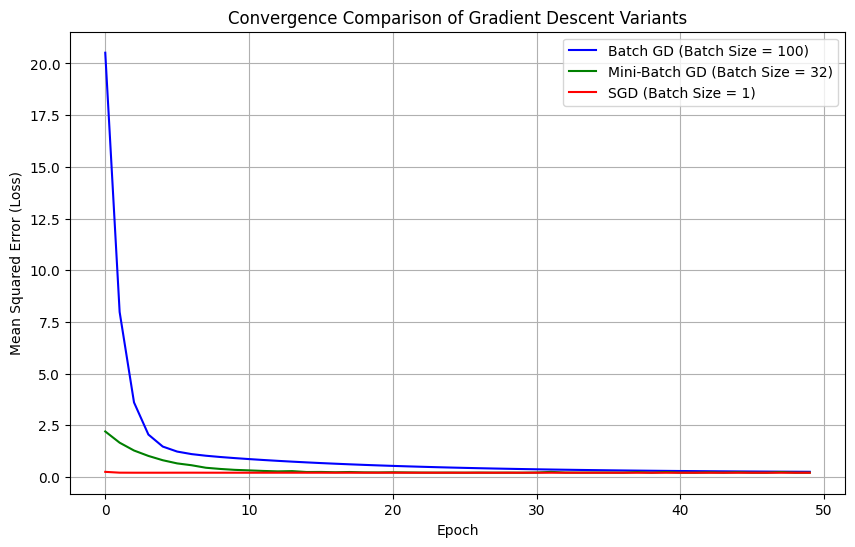

In [1]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data Generation ---
# Simple linear data: y = 4 + 2x + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y = 4 + 2 * X + np.random.randn(100, 1) * 0.5 # True intercept=4, True slope=2
X_b = np.c_[np.ones((100, 1)), X] # Add x0 = 1 for bias term

# Initial parameters and learning rate
learning_rate = 0.1
n_epochs = 50
m = len(X_b) # Total number of samples

# --- 2. Cost Function (Mean Squared Error) ---
def mse_loss(y_pred, y_true):
    return (1/len(y_true)) * np.sum((y_pred - y_true)**2)

# --- 3. Gradient Descent Functions ---

# A. Batch Gradient Descent (BGD)
def batch_gd(X_b, y, learning_rate, n_epochs):
    theta = np.random.randn(2, 1) # Initial random weights (theta0, theta1)
    loss_history = []
    
    for epoch in range(n_epochs):
        # 1. Calculate prediction
        y_pred = X_b.dot(theta)
        
        # 2. Calculate gradient (using all samples 'm')
        gradients = (2/m) * X_b.T.dot(y_pred - y)
        
        # 3. Update weights
        theta = theta - learning_rate * gradients
        
        # 4. Record loss
        loss = mse_loss(y_pred, y)
        loss_history.append(loss)
        
    return theta, loss_history

# B. Mini-Batch Gradient Descent (MBGD)
def mini_batch_gd(X_b, y, learning_rate, n_epochs, batch_size=32):
    theta = np.random.randn(2, 1)
    loss_history = []
    
    for epoch in range(n_epochs):
        # Shuffle data at the start of each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # Iterate over mini-batches
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            n_batch = len(X_batch)
            
            # 1. Calculate prediction
            y_pred = X_batch.dot(theta)
            
            # 2. Calculate gradient (using batch size 'n_batch')
            gradients = (2/n_batch) * X_batch.T.dot(y_pred - y_batch)
            
            # 3. Update weights
            theta = theta - learning_rate * gradients
        
        # Record loss for the entire dataset after the epoch
        final_y_pred = X_b.dot(theta)
        loss_history.append(mse_loss(final_y_pred, y))
        
    return theta, loss_history

# C. Stochastic Gradient Descent (SGD)
def sgd(X_b, y, learning_rate, n_epochs):
    theta = np.random.randn(2, 1)
    loss_history = []
    
    # Simple learning rate schedule (often necessary for pure SGD)
    def learning_schedule(t):
        t0, t1 = 5, 50
        return t0 / (t + t1)
    
    t = 0 # Iteration counter
    for epoch in range(n_epochs):
        # Shuffle data at the start of each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # Iterate over *each individual sample* (batch_size=1)
        for i in range(m):
            t += 1
            # Adjust learning rate dynamically
            lr = learning_schedule(t) 
            
            # Select ONE sample
            xi = X_shuffled[i:i+1] # Shape (1, 2)
            yi = y_shuffled[i:i+1] # Shape (1, 1)
            
            # 1. Calculate prediction
            y_pred = xi.dot(theta)
            
            # 2. Calculate gradient (using only ONE sample, m=1)
            # The 2/m term simplifies to 2/1 * xi.T * (y_pred - yi)
            gradients = 2 * xi.T.dot(y_pred - yi) 
            
            # 3. Update weights using the dynamic learning rate
            theta = theta - lr * gradients
        
        # Record loss for the entire dataset after the epoch
        final_y_pred = X_b.dot(theta)
        loss_history.append(mse_loss(final_y_pred, y))
        
    return theta, loss_history
# --- 4. Running the Algorithms ---
# 1. Batch GD
_, bgd_loss = batch_gd(X_b, y, learning_rate=0.1, n_epochs=50)

# 2. Mini-Batch GD (batch_size=32)
_, mbgd_loss = mini_batch_gd(X_b, y, learning_rate=0.1, n_epochs=50, batch_size=32)

# 3. SGD (uses a learning schedule)
_, sgd_loss = sgd(X_b, y, learning_rate=0.1, n_epochs=50)

# --- 5. Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(bgd_loss, label='Batch GD (Batch Size = 100)', color='blue')
plt.plot(mbgd_loss, label='Mini-Batch GD (Batch Size = 32)', color='green')
plt.plot(sgd_loss, label='SGD (Batch Size = 1)', color='red')

plt.title('Convergence Comparison of Gradient Descent Variants')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.show()